# Correlations

In this notebook I will be looking for further feature selection by finding highly correlated features to my target variable `CAT_ELIG`.  Something to note:
- 2007 dataset found some people ineligible for SNAP benefits so correlation was an appropriate measure.
- 2017, for New Mexico and Nebraska, all applications were approved for benefits therefore it is not an appropriate measure.
- Therefore, I will only use the datasets that were found to be correlated in 2007.  Then see how those variables changed in 2017.

- [Imports](#imports)
    - [2007](#2007)
    - [2017](#2017)
- [Feature Selection](#feasel)
    - [Correlation Dataframes](#corrdf)
    - [Correlation Plots](#corrplots)
    - [Observations](#observations)
    - [Correlated Features](#corrfea)
- [Final Dataset](#final)

# Imports   <a id=imports></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.decomposition import PCA
import autoreload
%load_ext autoreload
%autoreload 2
import python_code.Scripts as sc
import python_code.Reference as ref

In [2]:
#New Mexico
nm07 = pd.read_csv('./data/clean_nm07.csv')
nm17 = pd.read_csv('./data/clean_nm17.csv')

#Nebraska
ne07 = pd.read_csv('./data/clean_ne07.csv')
ne17 = pd.read_csv('./data/clean_ne17.csv')

# Feature Selection    <a id=feasel></a>

## _Correlated Dataframes_ <a id=corrdf></a>
I will use some excel lists compiled from the original data dictionaries to find the related features, if found, and put them into individual groupings of dataframes.  

### _Correlation Plots_<a id=corrplots></a>

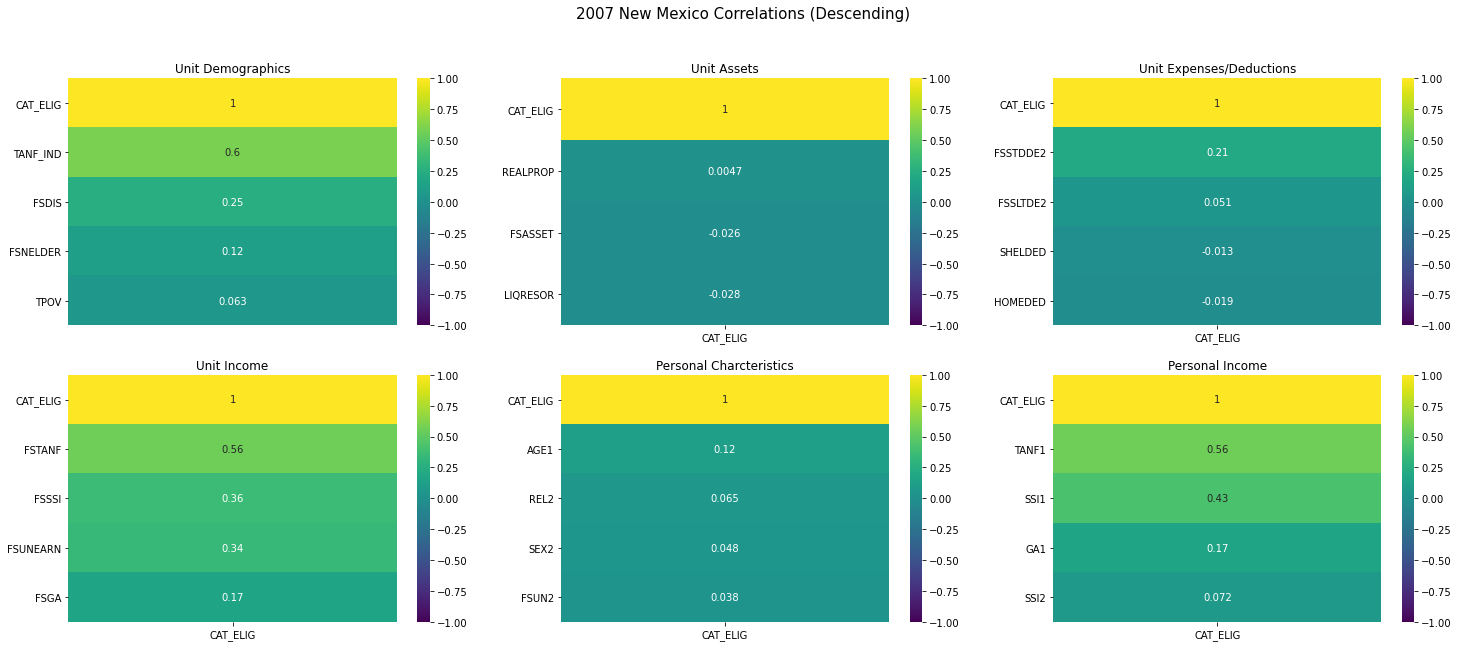

In [3]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 New Mexico Correlations (Descending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_nm07.png');

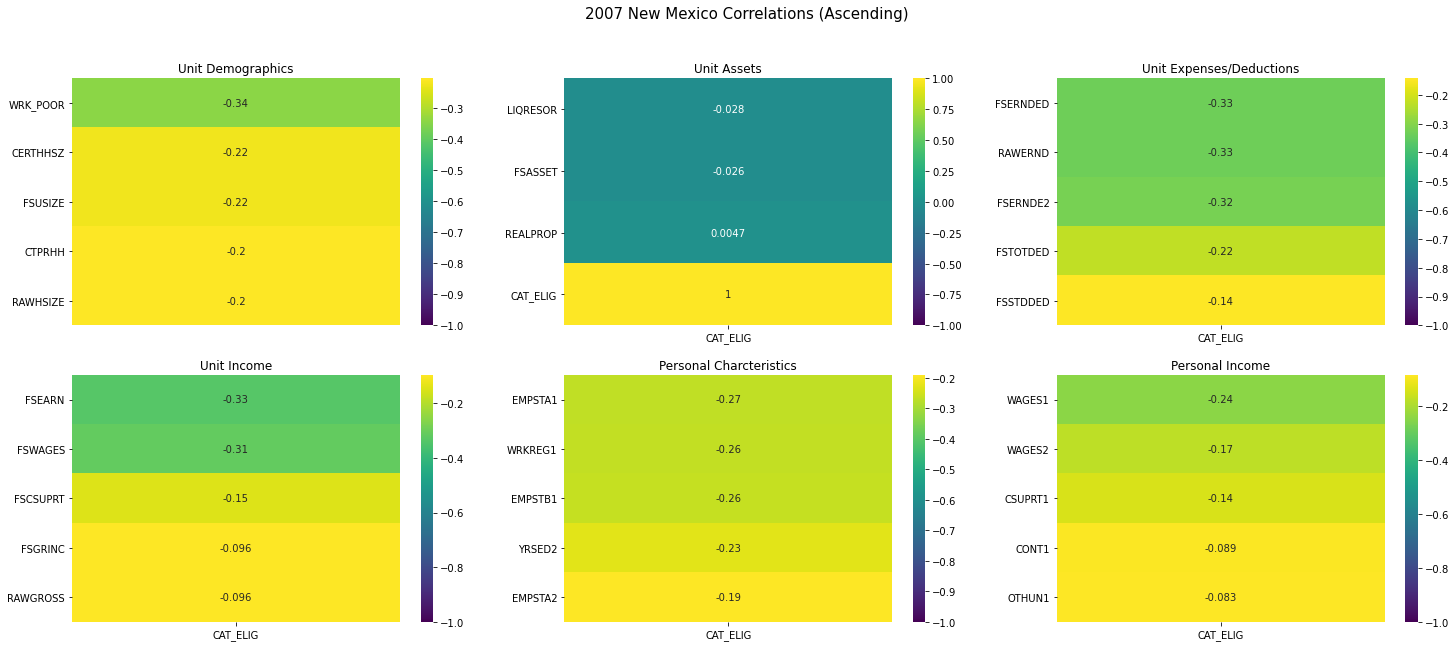

In [4]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 New Mexico Correlations (Ascending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrA_nm07.png');

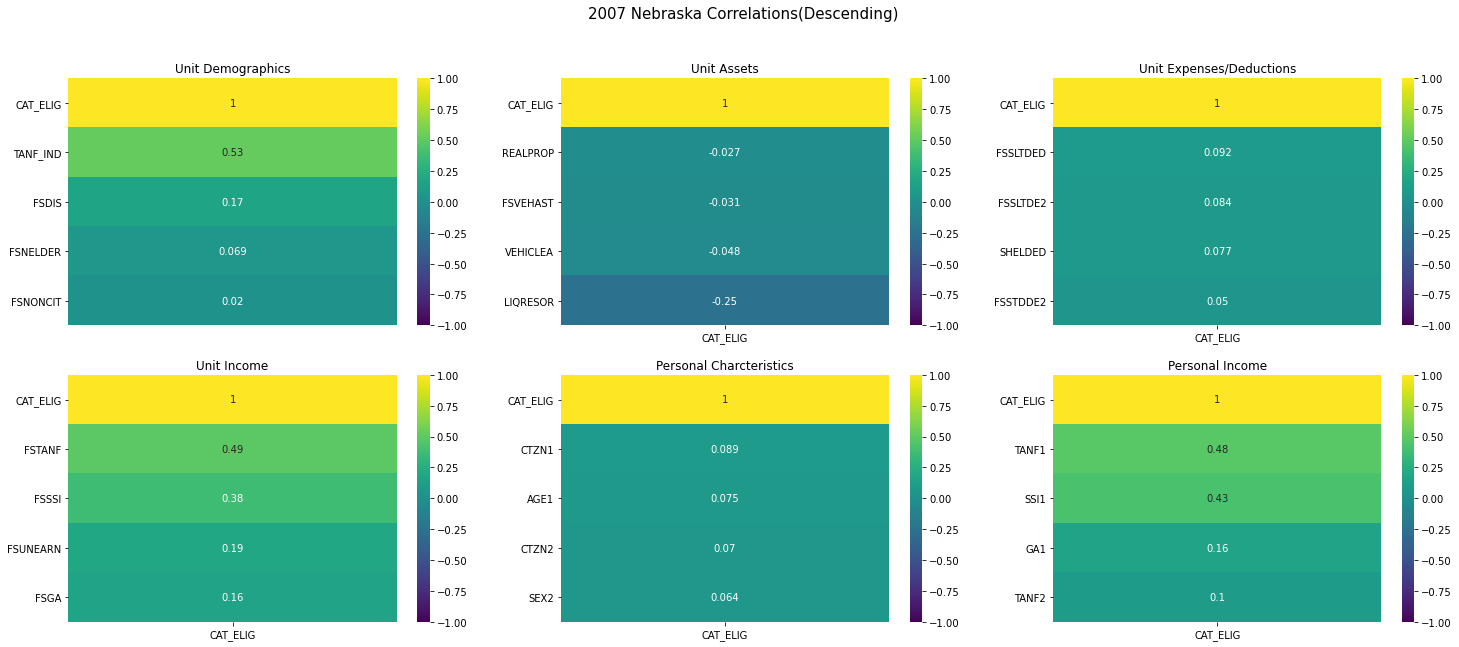

In [5]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 Nebraska Correlations(Descending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_ne07.png');

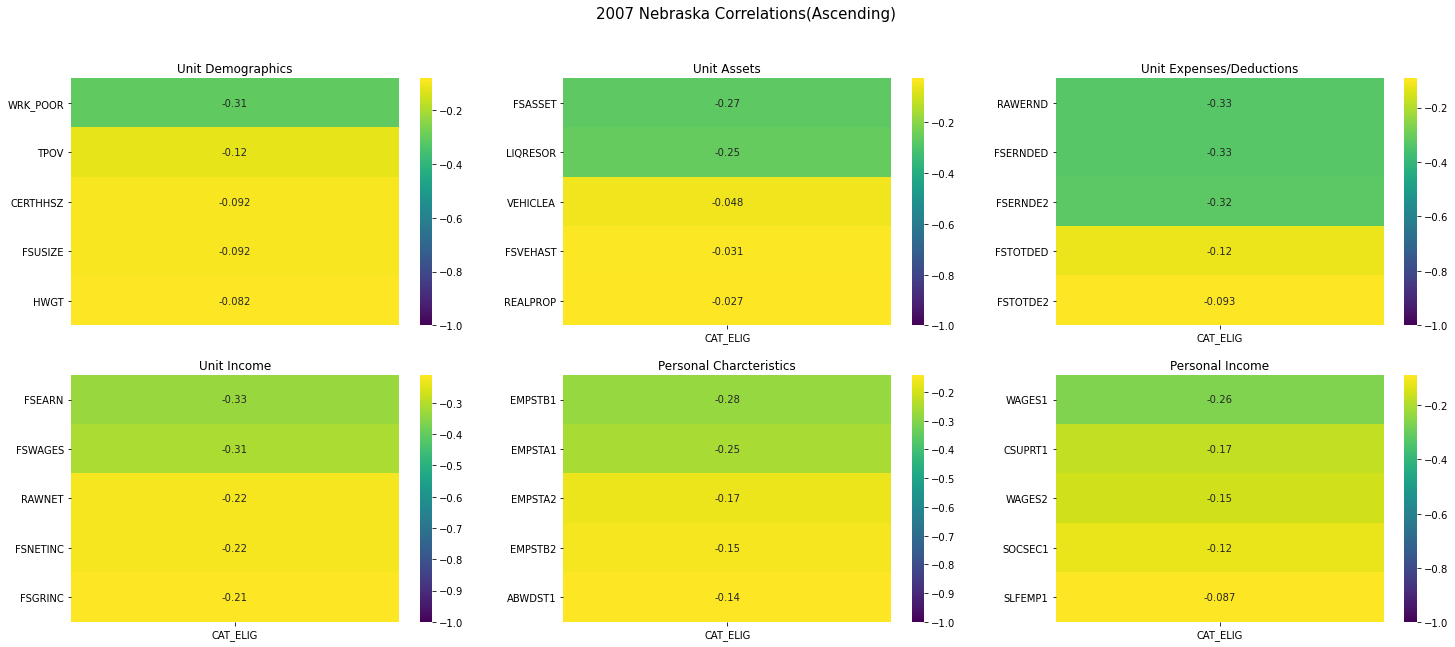

In [6]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 Nebraska Correlations(Ascending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrA_ne07.png');

### _Observations_ <a id=observations></a>

The order of highest to lowest impact on SNAP elgibility is:
1. Is the family receiving TANF benefits.
1. Is the head of household receiving TANF benefits?
1. is the head of household receiving social security (`SSI`):
1. Are other members in the household receiving social security?

This tells us that the biggest impact on vulnerable communities within New Mexico Nebraska are due to the head of households personal characteristics.  Out of that, we see the biggest impact on SNAP eligibility is receiving benefits from other assistance programs, especially TANF (Temporary Assistance for Needy Families).  What is interesting is that is a slightly bigger factor for New Mexico residents over Nebraska residents.  And more households/head of households were receiving TANF in 2007.  So maybe that accounts for wider eligibility of applicants in 2017, because less people in the SNAP program was receiving TANF income.

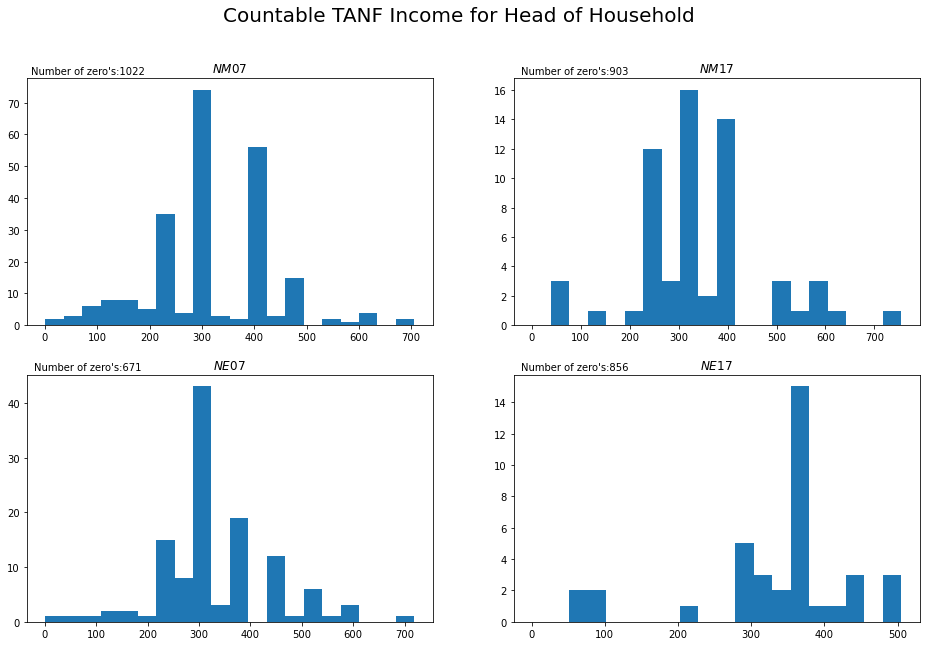

In [7]:
sc.plot_features_hist('FSTANF','unit_tanf',"Countable TANF Income for Head of Household")

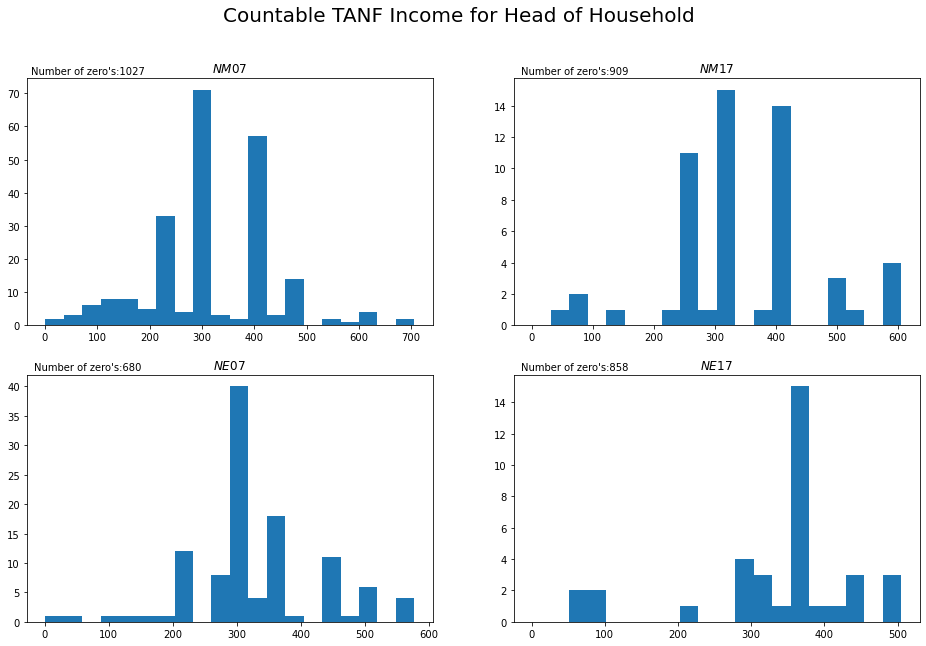

In [8]:
sc.plot_features_hist('TANF1','pers_tanf1',"Countable TANF Income for Head of Household")

There are other highly correlated categories that are similar in both.  After, receiving benefits from assistance programs, the next big category is `FSUNEARN` which is unit unearned income.  Meaning the majority of their income is coming from other assistance program, besides TANF and social security.

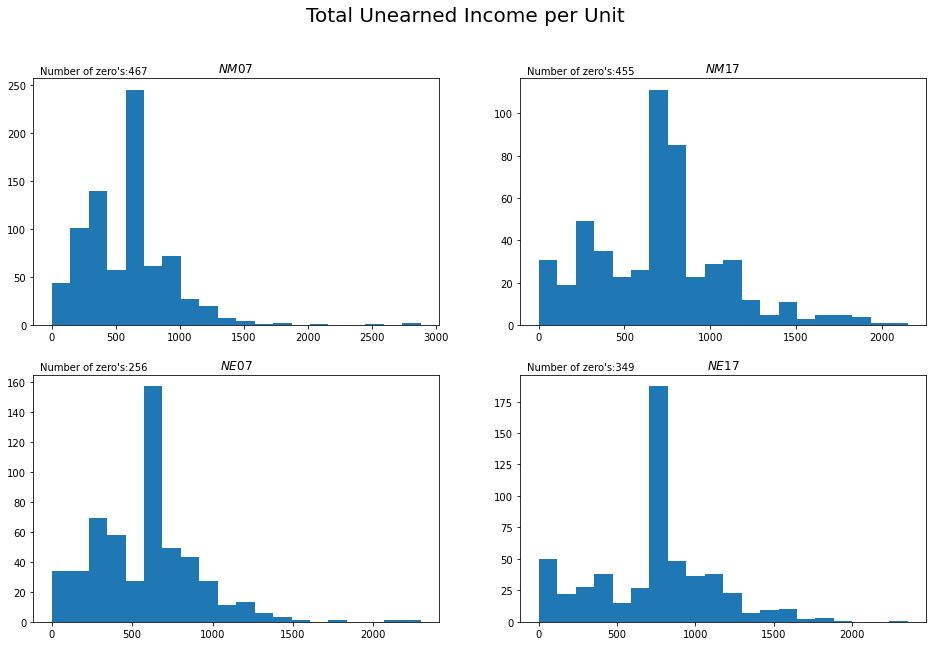

In [9]:
sc.plot_features_hist('FSUNEARN','unit_unearn',"Total Unearned Income per Unit")

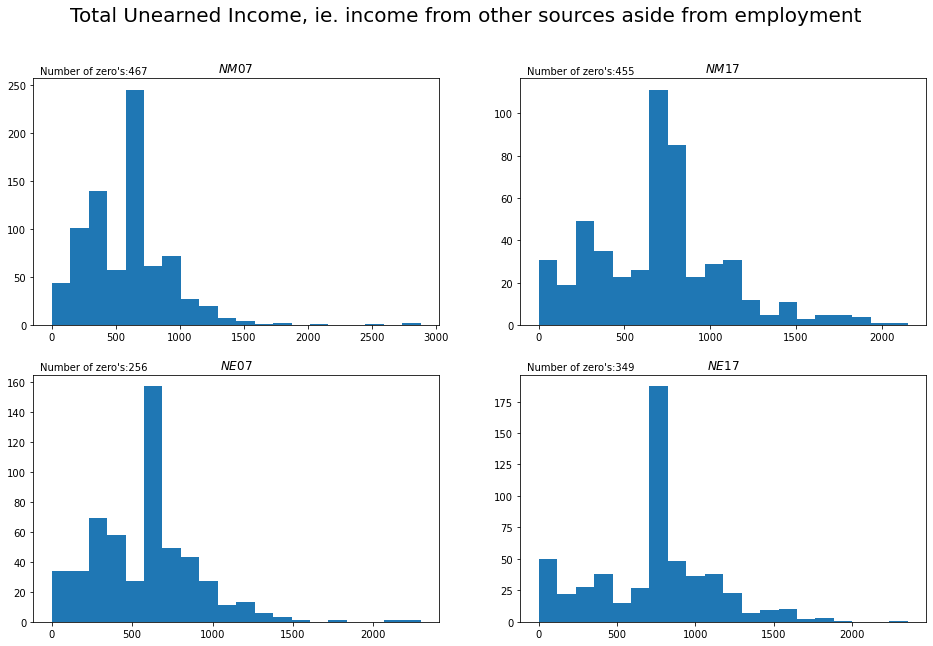

In [10]:
sc.plot_features_hist('FSUNEARN','unit_unearn',"Total Unearned Income, ie. income from other sources aside from employment")

And their are unexpected missing variables in these correlations.  First being `WRK_POOR` which means households with at least two indicators of earnings.  Meaning the majority of people receiving benefits in 2007 had 1 income source outside of financial assistance.  And in both 2007 and 2017 there are more people working yet qualifiying for benefits in New Mexico than in Nebraska.

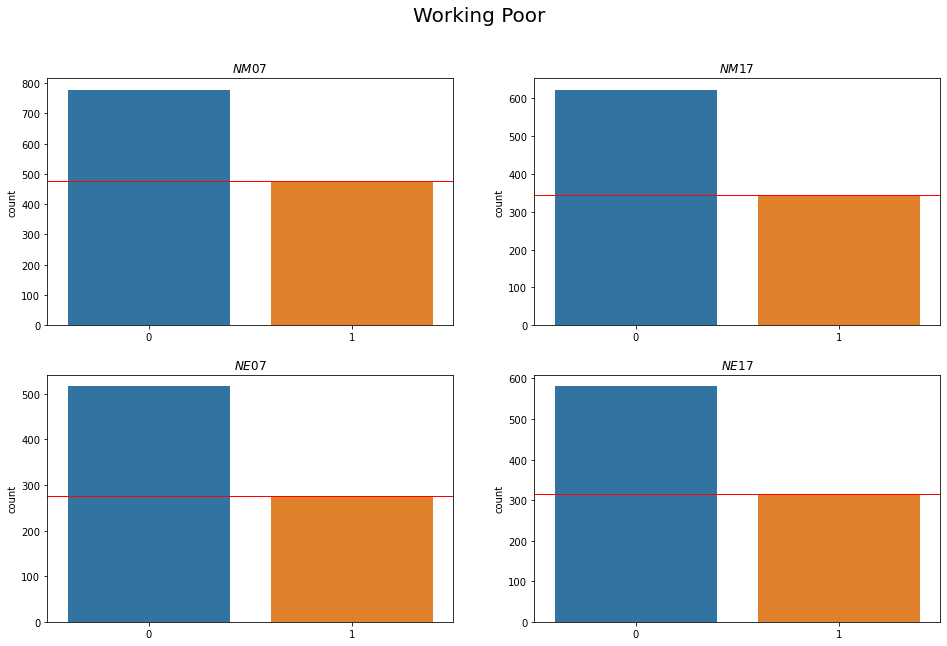

In [11]:
sc.plot_features('WRK_POOR','wrk_pr',"Working Poor")

The negative correlations are just as interesting.  It seems that in Nebraska, car ownership has a negative impact on receiving SNAP. But in New Mexico there were so few SNAP receipients with cars, both the `FSVEHAST` and `VEHICLEA` fields were dropped in the first EDA notebook.  

Though there is a note in the 2007 Technical Documents about vehicle ownership. This variable can signify one community not having access to alot of vehicles (New Mexico) vs another community having vehicles (Nebraska) and still receiving SNAP. 

_"Most units have no countable vehicle assets (FSVEHAST=0). Among units with positive
countable vehicle assets (FSVEHAST>0), some units are coded as having no vehicles
(VEHICLEA=1, VEHICLEB=1 or missing) or as having no countable vehicles
(VEHICLEA=1,2,3,4,5 and VEHICLEB=1,2,3,4,5 or missing). Because VEHICLEA and
VEHICLEB are not consistent with FSVEHAST, we recommend against using either variable to
tabulate the category of vehicle owned by the unit."_

`VEHICLEA` is not found in all datasets since more than half of the data was missing and therefore dropped in the first round of cuts.  The only dataset that it was reported in was Nebraska 2007 data, which has been graphed below. Of note on the categories: Category 2 means the vehicle is used to get income and therefore is exempt.

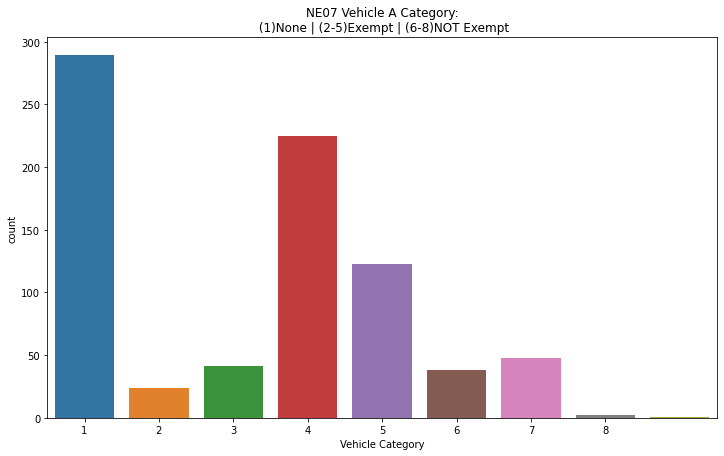

In [12]:
plt.figure(figsize = (12,7))
sns.countplot(ne07['VEHICLEA'])
plt.xticks(np.arange(8),labels=[1,2,3,4,5,6,7,8])
plt.xlabel("Vehicle Category")
plt.title("NE07 Vehicle A Category:\n (1)None | (2-5)Exempt | (6-8)NOT Exempt")
plt.savefig("./images/ind_features/vehA.png");

### _Correlated features_ <a id=corrfea></a>

I will be using all of the top and bottom indicators for a final dataset of values to be passed into a model for prediction.

In [13]:
set1 = list(pd.DataFrame(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set2 = list(pd.DataFrame(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set3 = list(pd.DataFrame(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set4 = list(pd.DataFrame(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set5 = list(pd.DataFrame(sc.corr_df(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set6 = list(pd.DataFrame(sc.corr_df(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)

set7 = list(pd.DataFrame(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set8 = list(pd.DataFrame(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set9 = list(pd.DataFrame(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set10 = list(pd.DataFrame(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set11 = list(pd.DataFrame(sc.corr_df(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set12 = list(pd.DataFrame(sc.corr_df(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)

corr_features = set1 + set2 + set3 + set4 + set5 + set6 + set7 + set8 + set9 + set10 + set11

In [14]:
set1 = list(pd.DataFrame(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set2 = list(pd.DataFrame(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set3 = list(pd.DataFrame(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set4 = list(pd.DataFrame(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set5 = list(pd.DataFrame(sc.corr_df(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set6 = list(pd.DataFrame(sc.corr_df(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)

set7 = list(pd.DataFrame(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set8 = list(pd.DataFrame(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set9 = list(pd.DataFrame(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set10 = list(pd.DataFrame(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set11 = list(pd.DataFrame(sc.corr_df(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set12 = list(pd.DataFrame(sc.corr_df(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)

corr_features = set1 + set2 + set3 + set4 + set5 + set6 + set7 + set8 + set9 + set10 + set11
corr_features=set(corr_features)
corr_features.remove('CAT_ELIG')

In [15]:
print(f'There are {len(corr_features)} features in corr_features:\n')
corr_features

There are 32 features in corr_features:



{'CERTHHSZ',
 'FSASSET',
 'FSDIS',
 'FSEARN',
 'FSERNDE2',
 'FSERNDED',
 'FSGA',
 'FSGRINC',
 'FSNELDER',
 'FSNETINC',
 'FSNONCIT',
 'FSSLTDE2',
 'FSSLTDED',
 'FSSSI',
 'FSSTDDE2',
 'FSTANF',
 'FSTOTDE2',
 'FSTOTDED',
 'FSUNEARN',
 'FSUSIZE',
 'FSVEHAST',
 'FSWAGES',
 'HWGT',
 'LIQRESOR',
 'RAWERND',
 'RAWNET',
 'REALPROP',
 'SHELDED',
 'TANF_IND',
 'TPOV',
 'VEHICLEA',
 'WRK_POOR'}

# Final Dataset <a id=final></a>

In [26]:
corr_features=list(corr_features)
pd.DataFrame(corr_features,columns=['Table 1']).to_csv("./data/corr_features.csv",index=None)

In [17]:
df1 = sc.final(corr_features,nm07)
df2 = sc.final(corr_features,nm17)
df3 = sc.final(corr_features,ne07)
df4 = sc.final(corr_features,ne17)

In [18]:
df = pd.concat([df1,df2,df3,df4])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3904 entries, 0 to 893
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FSGRINC   3904 non-null   float64
 1   REALPROP  2046 non-null   float64
 2   FSGA      3904 non-null   float64
 3   FSSSI     3904 non-null   float64
 4   CERTHHSZ  3904 non-null   float64
 5   FSDIS     3904 non-null   float64
 6   FSSLTDE2  3904 non-null   float64
 7   FSUNEARN  3904 non-null   float64
 8   FSTOTDED  3904 non-null   float64
 9   TANF_IND  3904 non-null   float64
 10  LIQRESOR  2940 non-null   float64
 11  FSWAGES   3904 non-null   float64
 12  FSSLTDED  3904 non-null   float64
 13  FSNONCIT  3904 non-null   float64
 14  FSERNDED  3904 non-null   float64
 15  FSEARN    3904 non-null   float64
 16  FSTOTDE2  3904 non-null   float64
 17  FSSTDDE2  3904 non-null   float64
 18  FSERNDE2  3904 non-null   float64
 19  FSUSIZE   3904 non-null   float64
 20  WRK_POOR  3904 non-null   float

In [20]:
df.isnull().sum()

FSGRINC        0
REALPROP    1858
FSGA           0
FSSSI          0
CERTHHSZ       0
FSDIS          0
FSSLTDE2       0
FSUNEARN       0
FSTOTDED       0
TANF_IND       0
LIQRESOR     964
FSWAGES        0
FSSLTDED       0
FSNONCIT       0
FSERNDED       0
FSEARN         0
FSTOTDE2       0
FSSTDDE2       0
FSERNDE2       0
FSUSIZE        0
WRK_POOR       0
FSASSET      964
FSTANF         0
HWGT           0
FSNELDER       0
SHELDED        0
TPOV           0
FSNETINC       0
RAWNET         0
RAWERND        0
CAT_ELIG       0
FSVEHAST    2219
VEHICLEA    3113
dtype: int64

We have some expected null values in the final dataframe since not all fields in all 4 datasets made it past the initial cuts.  `VEHICLEA` will be replaced with a 1, all others will be filled with 0.

In [21]:
df['VEHICLEA']=df['VEHICLEA'].fillna(1)

In [22]:
df.isnull().sum()

FSGRINC        0
REALPROP    1858
FSGA           0
FSSSI          0
CERTHHSZ       0
FSDIS          0
FSSLTDE2       0
FSUNEARN       0
FSTOTDED       0
TANF_IND       0
LIQRESOR     964
FSWAGES        0
FSSLTDED       0
FSNONCIT       0
FSERNDED       0
FSEARN         0
FSTOTDE2       0
FSSTDDE2       0
FSERNDE2       0
FSUSIZE        0
WRK_POOR       0
FSASSET      964
FSTANF         0
HWGT           0
FSNELDER       0
SHELDED        0
TPOV           0
FSNETINC       0
RAWNET         0
RAWERND        0
CAT_ELIG       0
FSVEHAST    2219
VEHICLEA       0
dtype: int64

In [23]:
df = df.fillna(0)

In [24]:
df.isnull().sum().sum()

0

In [25]:
df.to_csv('./data/final.csv',index=None)